In [2]:
# data => banknotes.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
df.shape

(1372, 5)

In [10]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# separate the data
x = df.drop('Class', axis = 1)   # input
y = df['Class']

In [16]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


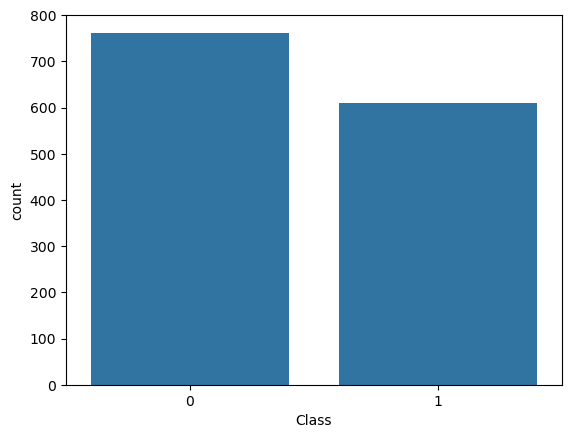

In [18]:
sns.countplot(x = y);

In [20]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

#### cross validation

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [25]:
x_train.shape

(1029, 4)

In [27]:
y_train.shape

(1029,)

#### Build the model

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()

In [34]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

#### Evaluation

In [37]:
y_pred = dt.predict(x_test)

In [41]:
y_pred;

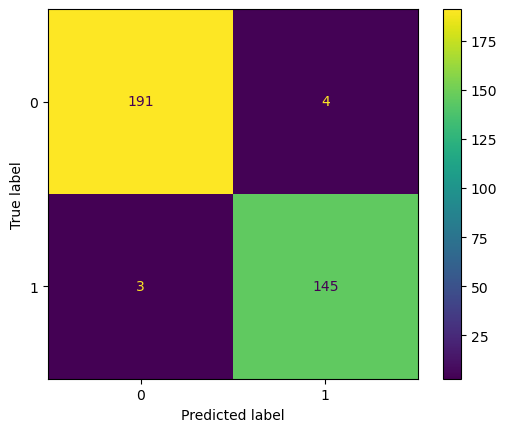

In [45]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [47]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [49]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9795918367346939

#### plot the tree

In [52]:
from sklearn.tree import plot_tree

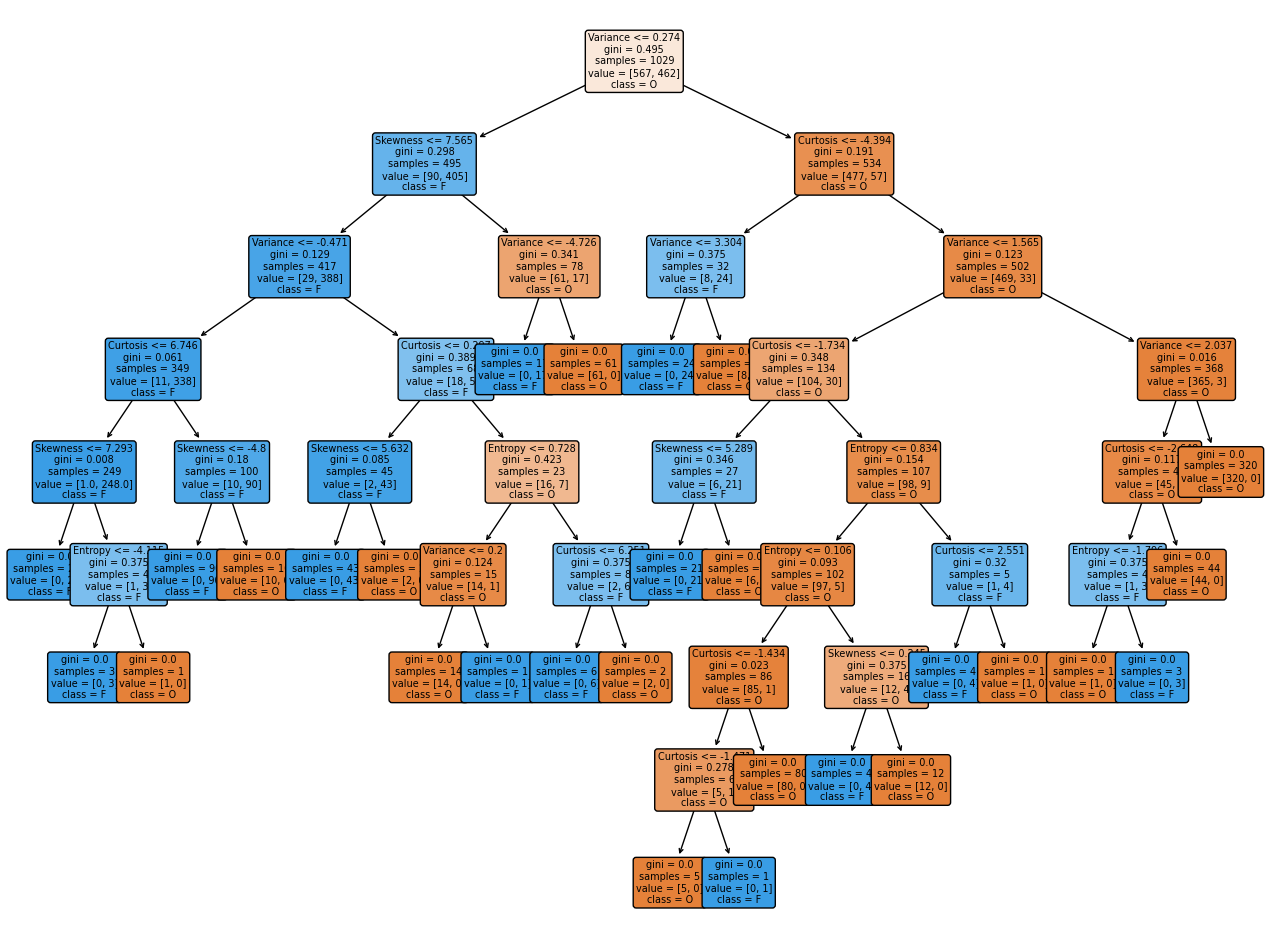

In [58]:
plt.figure(figsize=(16,12))

plot_tree(dt, rounded = True, filled= True, fontsize = 7,
         feature_names= list(x.columns), class_names=['O', 'F']);

In [60]:
dt.feature_importances_

array([0.62095248, 0.20497996, 0.14503505, 0.02903252])

In [62]:
x.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

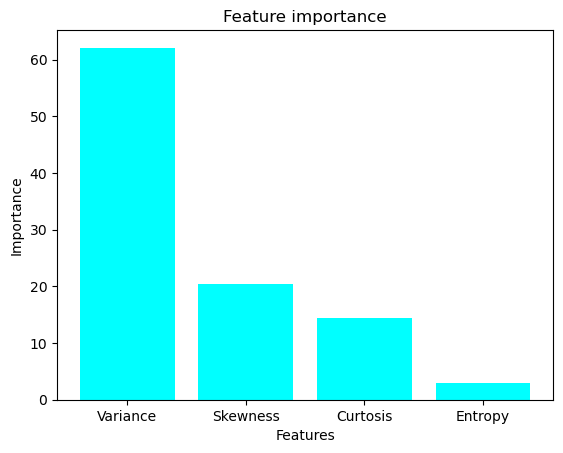

In [68]:
# feature importance
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.bar(x.columns, dt.feature_importances_ * 100, color = 'cyan');

In [70]:
# predict

new = [[2.62160, 7.66610, -3.8073, -0.47699]]

In [72]:
dt.predict(new)

array([0])

In [74]:
dt.predict_proba(new)  # predict probabilities

array([[1., 0.]])